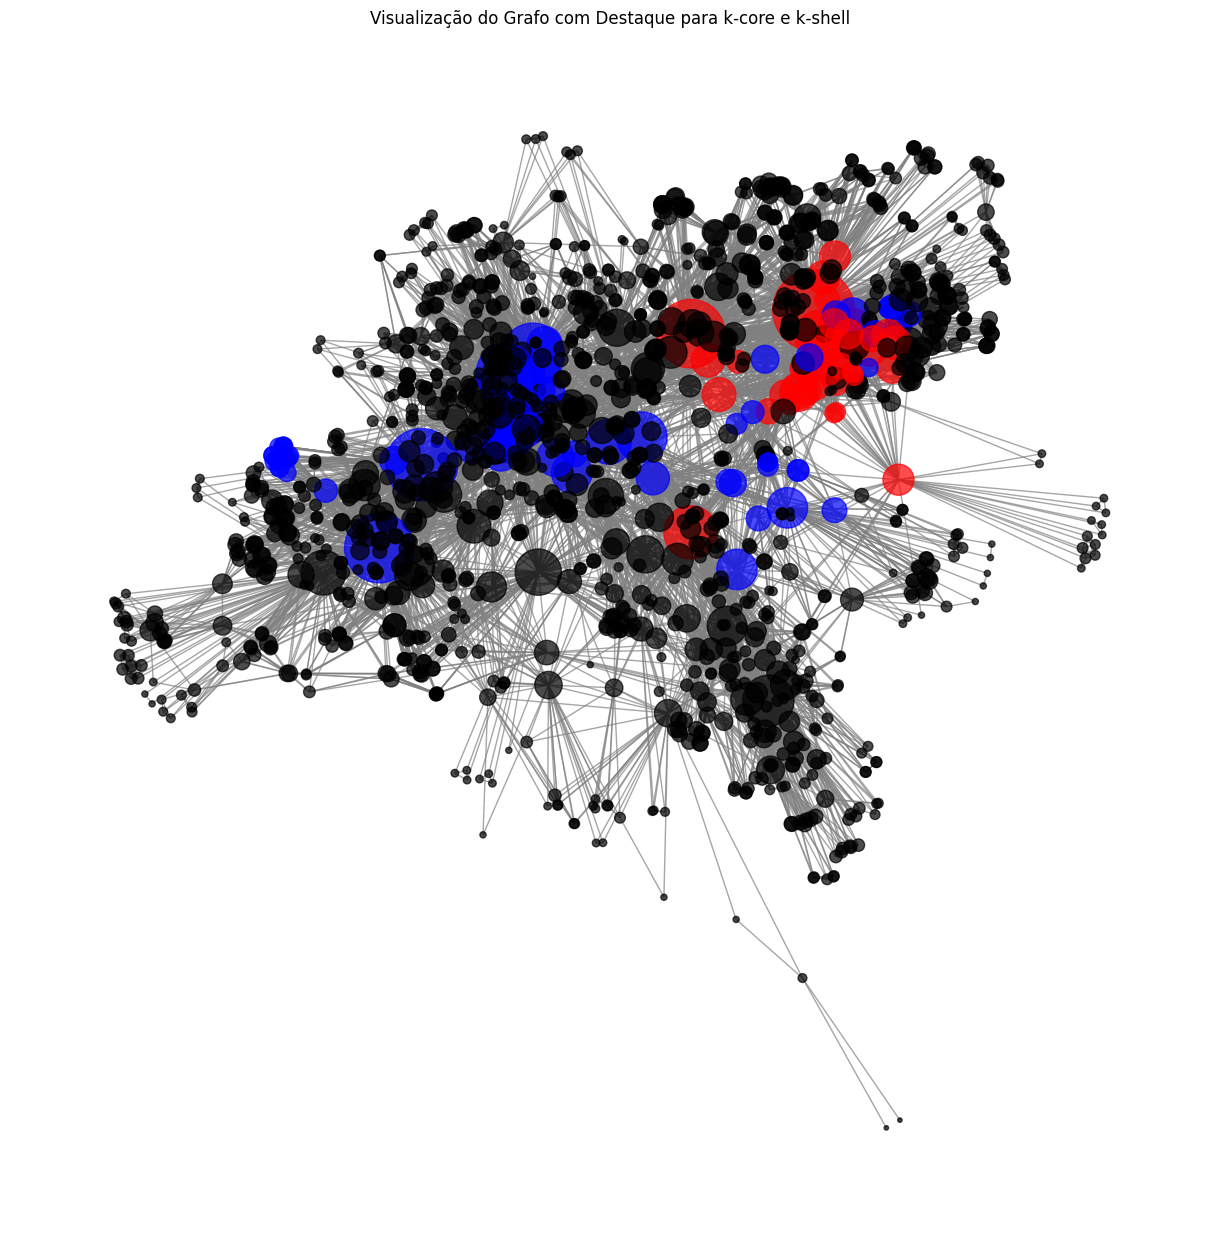

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o grafo a partir do arquivo GraphML
input_file = "Untitled.graphml"
graph = nx.read_graphml(input_file)

# Remover self-loops
graph.remove_edges_from(nx.selfloop_edges(graph))

# Calcular k-core
k_core = nx.core_number(graph)  # Dicionário com os valores de k-core
nx.set_node_attributes(graph, k_core, "k-core")

# Encontrar o maior k-core (subgrafo)
max_k_core_value = max(k_core.values())
max_k_core_nodes = [node for node, value in k_core.items() if value == max_k_core_value]

# Calcular graus (degree)
degree = dict(graph.degree())
nx.set_node_attributes(graph, degree, "degree")

# Preparar tamanhos e cores dos nós
node_sizes = [degree[node] * 10 for node in graph.nodes()]  # Tamanho proporcional ao grau
node_colors = []

for node in graph.nodes():
    if node in max_k_core_nodes:
        node_colors.append("red")  # Destacar k-core
    elif k_core[node] == max_k_core_value - 1:
        node_colors.append("blue")  # Destacar k-shell
    else:
        node_colors.append("black")  # Restante dos nós

# Plotar o grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, seed=42)  # Layout do grafo
nx.draw(
    graph,
    pos,
    with_labels=False,
    node_size=node_sizes,
    node_color=node_colors,
    edge_color="gray",
    alpha=0.7,
)
plt.title("Visualização do Grafo com Destaque para k-core e k-shell")
plt.show()
